In [140]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix



In [141]:
df = pd.read_csv('/Users/prasadpilankar/Documents/BAN/DE2025/DataCenterInfra/DataCenters-Infra-Expansion-CapstoneProject/clean-data/DC-ClusteredData.csv')
df.head()

,STATE,CITY,LOCATION,ENERGY,AREA,IT EQUIPMENT POWER,State_Aggregated_PUE,FULL_CABINETS,PARTIAL_CABINETS,SHARED_RACKSPACE,...,BUILD_TO_SUIT,FOOTPRINTS,REMOTE_HANDS,YEAR_OPERATIONAL,INTERNET_EXCHANGE_POINTS,State_Aggregated_IXP_Count,LOCATION_ID,Cluster,PCA1,PCA2
0,FL,Miami,36 NE 2nd St (MIA10),1.3,10200,0.91,1.8,True,True,True,...,True,True,True,1925,6,7,1,2,-3.014297,3.591258
1,FL,Miami,RadiusDC Miami I,9.2,15795,6.44,1.8,True,True,True,...,True,True,True,2001,6,7,2,2,-2.538831,3.165288
2,FL,Miami,Volico Miami 2,10.0,5000,7.00,1.8,True,True,True,...,True,True,True,1925,6,7,3,2,-2.853841,3.441460
3,FL,Miami,Raeden MIA2,3.0,32000,2.10,1.8,True,True,True,...,True,True,True,2006,6,7,4,2,-2.584746,3.006199
4,FL,Orlando,CoreSite Orlando (OR1),7.0,130000,4.90,1.8,True,True,True,...,False,True,True,1984,3,7,5,2,-1.855385,3.419699


In [142]:
df.info()
df.describe()
df.isnull().sum()
df['Cluster'].value_counts()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39 entries, 0 to 38
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   STATE                       39 non-null     object 
 1   CITY                        39 non-null     object 
 2   LOCATION                    39 non-null     object 
 3   ENERGY                      39 non-null     float64
 4   AREA                        39 non-null     int64  
 5   IT EQUIPMENT POWER          39 non-null     float64
 6   State_Aggregated_PUE        39 non-null     float64
 7   FULL_CABINETS               39 non-null     bool   
 8   PARTIAL_CABINETS            39 non-null     bool   
 9   SHARED_RACKSPACE            39 non-null     bool   
 10  CAGES                       39 non-null     bool   
 11  SUITES                      39 non-null     bool   
 12  BUILD_TO_SUIT               39 non-null     bool   
 13  FOOTPRINTS                  39 non-nu

2    16
0    13
1    10
Name: Cluster, dtype: int64

In [ ]:
# Exclude specific variables if needed
excluded_columns = ['LOCATION_ID', 'Cluster', 'PCA1', 'PCA2','LOCATION']

# Object columns
object_cols = df.select_dtypes(include=['object']).columns.difference(excluded_columns)
print("EDA for Object Columns:")
for col in object_cols:
    print(f"\nColumn: {col}")
    print(df[col].value_counts())
    print("-" * 50)

# Float columns
float_cols = df.select_dtypes(include=['float64']).columns.difference(excluded_columns)
print("\nEDA for Float Columns:")
print(df[float_cols].describe())
print("-" * 50)

# Integer columns
int_cols = df.select_dtypes(include=['int64']).columns.difference(excluded_columns)
print("\nEDA for Integer Columns:")
print(df[int_cols].describe())
print("-" * 50)

# Boolean columns
print("\nEDA for Boolean Columns:")
for col in bool_cols:
    print(f"\nColumn: {col}")
    print(df[col].value_counts())
    print("-" * 50)

In [143]:
#Cluster Distribution

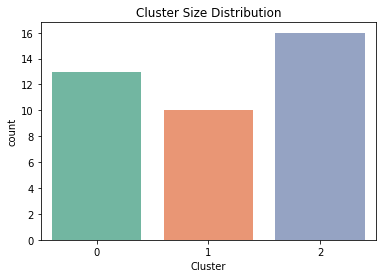

In [144]:
# Cluster counts
sns.countplot(x='Cluster', data=df, palette='Set2')
plt.title('Cluster Size Distribution')
plt.show()


In [145]:
#PCA Scatter Plot (Visualize Cluster Separation)

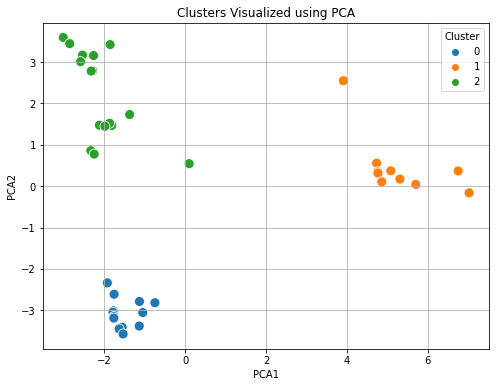

In [146]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='Cluster', palette='tab10', s=100)
plt.title('Clusters Visualized using PCA')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()


In [147]:
#Feature Distribution Across Clusters (Boxplots)

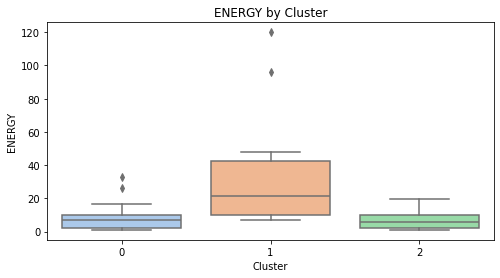

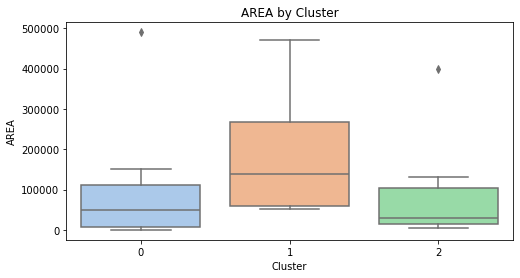

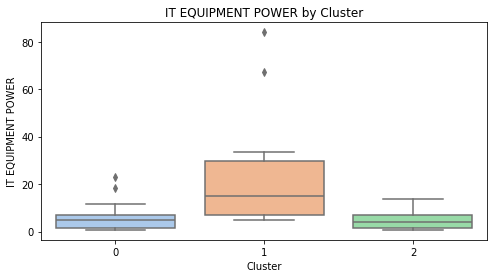

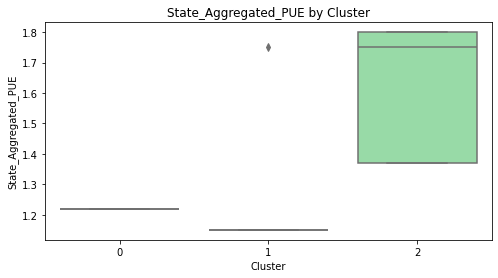

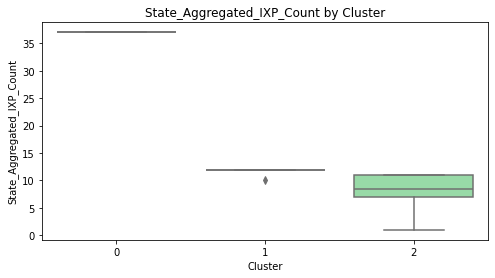

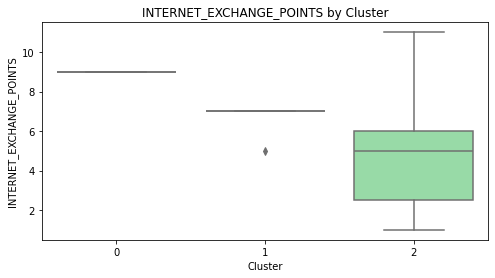

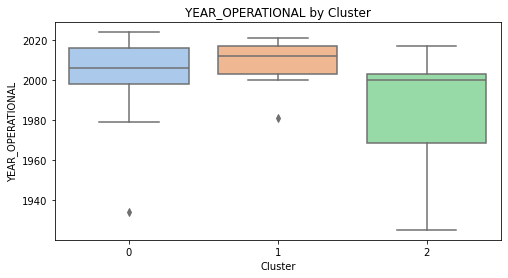

In [148]:
numeric_cols = ['ENERGY', 'AREA', 'IT EQUIPMENT POWER', 'State_Aggregated_PUE', 'State_Aggregated_IXP_Count','INTERNET_EXCHANGE_POINTS', 'YEAR_OPERATIONAL']

for col in numeric_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x='Cluster', y=col, data=df, palette='pastel')
    plt.title(f'{col} by Cluster')
    plt.show()


In [149]:
# Heatmap of Cluster-wise Means (📊 Summary View)

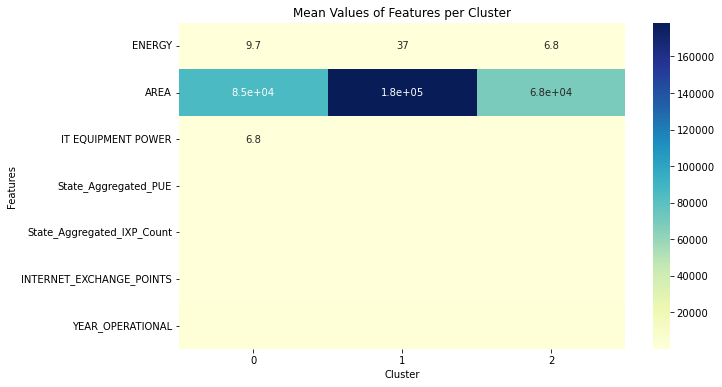

In [150]:
cluster_means = df.groupby('Cluster')[numeric_cols].mean().round(2)

plt.figure(figsize=(10, 6))
sns.heatmap(cluster_means.T, annot=True, cmap='YlGnBu')
plt.title('Mean Values of Features per Cluster')
plt.ylabel('Features')
plt.xlabel('Cluster')
plt.show()


In [151]:
#Boolean Feature Distribution per Cluster

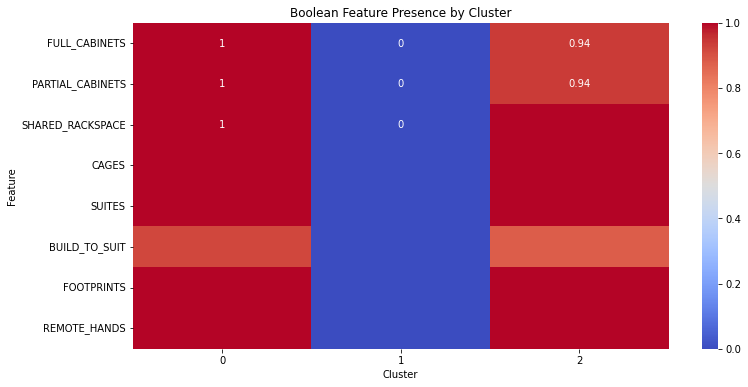

In [152]:
bool_cols = ['FULL_CABINETS', 'PARTIAL_CABINETS', 'SHARED_RACKSPACE', 'CAGES', 'SUITES', 'BUILD_TO_SUIT', 'FOOTPRINTS', 'REMOTE_HANDS']

bool_summary = df.groupby('Cluster')[bool_cols].sum()

# Normalize if you want percentage presence
bool_percentage = bool_summary.div(df['Cluster'].value_counts(), axis=0).round(2)

# Heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(bool_percentage.T, annot=True, cmap='coolwarm')
plt.title('Boolean Feature Presence by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Feature')
plt.show()


In [153]:
#Pairplot (if you want deeper pairwise understanding)

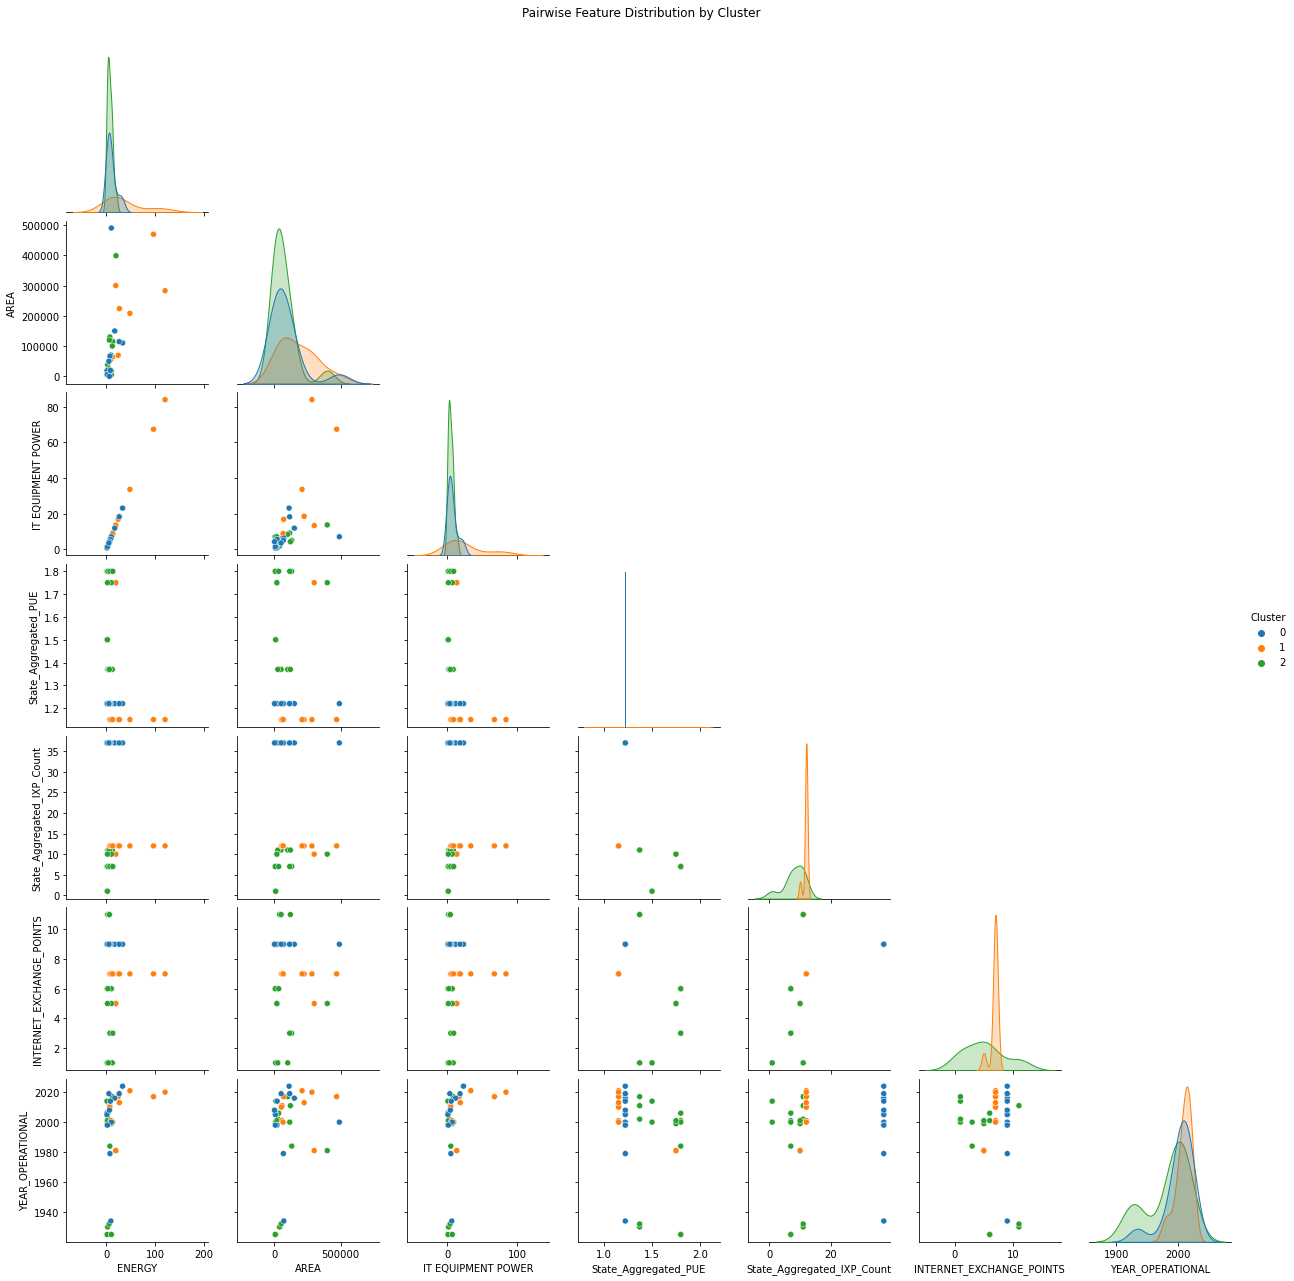

In [154]:
sns.pairplot(df[numeric_cols + ['Cluster']], hue='Cluster', palette='tab10', corner=True)
plt.suptitle('Pairwise Feature Distribution by Cluster', y=1.02)
plt.show()


In [155]:
#Cluster Insights Table (Quantitative Summary)

In [156]:
cluster_summary = df.groupby('Cluster')[numeric_cols + bool_cols].mean().round(2)
display(cluster_summary)


,ENERGY,AREA,IT EQUIPMENT POWER,State_Aggregated_PUE,State_Aggregated_IXP_Count,INTERNET_EXCHANGE_POINTS,YEAR_OPERATIONAL,FULL_CABINETS,PARTIAL_CABINETS,SHARED_RACKSPACE,CAGES,SUITES,BUILD_TO_SUIT,FOOTPRINTS,REMOTE_HANDS
Cluster,,,,,,,,,,,,,,,
0,9.69,85310.92,6.78,1.22,37.00,9.00,2001.54,1.00,1.00,1.0,1.0,1.0,0.92,1.0,1.0
1,36.90,178514.60,25.83,1.21,11.80,6.80,2009.10,0.00,0.00,0.0,0.0,0.0,0.00,0.0,0.0
2,6.75,68412.19,4.72,1.62,8.06,5.12,1983.00,0.94,0.94,1.0,1.0,1.0,0.88,1.0,1.0


In [157]:
# Convert boolean columns to binary
bool_cols = ['FULL_CABINETS', 'PARTIAL_CABINETS', 'SHARED_RACKSPACE', 'CAGES',
             'SUITES', 'BUILD_TO_SUIT', 'FOOTPRINTS', 'REMOTE_HANDS']
df[bool_cols] = df[bool_cols].astype(int)

# Keep full DataFrame intact, but select only required columns for training
features = ['ENERGY', 'AREA', 'IT EQUIPMENT POWER', 'State_Aggregated_PUE'] + bool_cols + ['YEAR_OPERATIONAL', 'State_Aggregated_IXP_Count']
X = df[features]
y = df['Cluster']


In [158]:
df.columns

Index(['STATE', 'CITY', 'LOCATION', 'ENERGY', 'AREA', 'IT EQUIPMENT POWER',
       'State_Aggregated_PUE', 'FULL_CABINETS', 'PARTIAL_CABINETS',
       'SHARED_RACKSPACE', 'CAGES', 'SUITES', 'BUILD_TO_SUIT', 'FOOTPRINTS',
       'REMOTE_HANDS', 'YEAR_OPERATIONAL', 'INTERNET_EXCHANGE_POINTS',
       'State_Aggregated_IXP_Count', 'LOCATION_ID', 'Cluster', 'PCA1', 'PCA2'],
      dtype='object')

In [159]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [160]:
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Predict on test set
y_pred = rf_model.predict(X_test_scaled)


📊 Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         2
           2       1.00      1.00      1.00         3

    accuracy                           1.00         8
   macro avg       1.00      1.00      1.00         8
weighted avg       1.00      1.00      1.00         8



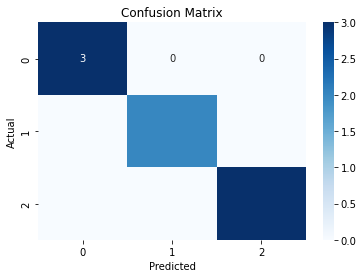

In [161]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Classification report
print("📊 Classification Report:\n")
print(classification_report(y_test, y_pred))

# Confusion matrix heatmap
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


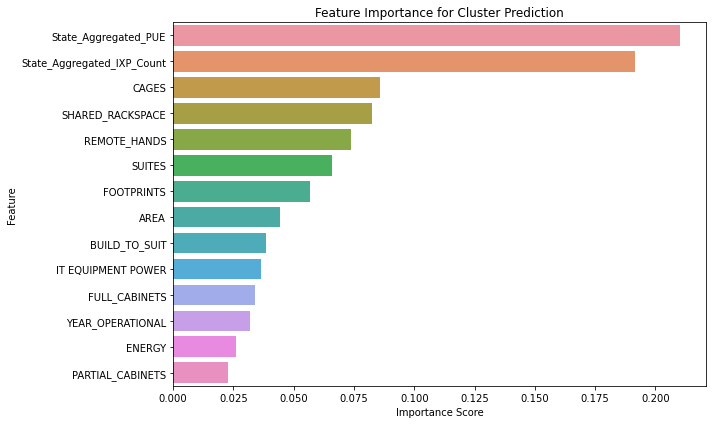

In [162]:
importances = rf_model.feature_importances_
feature_names = X.columns
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
sns.barplot(x=importances[indices], y=feature_names[indices])
plt.title("Feature Importance for Cluster Prediction")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


In [163]:
# Create a test case
new_dc = pd.DataFrame([{
    'ENERGY': 20,
    'AREA': 120000,
    'IT EQUIPMENT POWER': 15.0,
    'State_Aggregated_PUE': 1.43,
    'FULL_CABINETS': 0,
    'PARTIAL_CABINETS': 0,
    'SHARED_RACKSPACE': 0,
    'CAGES': 0,
    'SUITES': 0,
    'BUILD_TO_SUIT': 0,
    'FOOTPRINTS': 0,
    'REMOTE_HANDS': 0,
    'YEAR_OPERATIONAL': 2023,
    'State_Aggregated_IXP_Count': 1.5
}])



# Scale like training data
new_dc_scaled = scaler.transform(new_dc)

# Predict cluster
predicted_cluster = rf_model.predict(new_dc_scaled)
print(f"📌 The new data center belongs to Cluster: {predicted_cluster[0]}")


📌 The new data center belongs to Cluster: 1


In [164]:
#STREAMLIT

In [165]:
import joblib

# Save the trained model and scaler
joblib.dump(rf_model, 'rf_model.pkl')
joblib.dump(scaler, 'scaler.pkl')

print("✅ Model and scaler have been saved successfully!")


✅ Model and scaler have been saved successfully!
